<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/CV_with_Tensorflow_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CV with Tensorflow 2.x - Part 2](https://learning.oreilly.com/scenarios/computer-vision-loading/9781492094418/)

## Computer Vision: Loading and Preparing the Fashion MNIST Data

Unlike housing prices, it's hard to write down rules for a computer vision problem. Suppose we want to recognize different items of clothing trained from a dataset containing 10 different types. This is essentially a classification problem for images.

In an image classificaion problem, each input corresponds to an image, each consiting of K features equal to the number of pixels it is made up of. For instance, a `32 x 32` RGB image would have `32 x 32 x 3` features.

In [1]:
!pip install tensorflow matplotlib==3.1.3 &> /dev/null

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

We will train a NN to recognize items of clothing from Fashion MNIST, which contains 70,000 items of clothing in 10 different categories, where each item of clothing is in a `28 x 28` greyscale image:

![image.png](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true) 

In [4]:
mnist = tf.keras.datasets.fashion_mnist


## Split and normalize data
Normalization is a key step in any machine learning problem. We would like all values to be within the same small range in order for the optimizer to work more efficiently.

In [5]:
# The .load_data() method returns two sets of two lists. 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# Normalize: for NN, it's easier if all values are between 0 and 1.
print("Few pixel values BEFORE normalization: \n", train_images[0,20:26,20:26])
train_images  = train_images / 255.0
test_images = test_images / 255.0
print("\nFew pixel values AFTER normalization: \n", train_images[0,20:26,20:26])

Few pixel values BEFORE normalization: 
 [[218 212 209 222 220 221]
 [186 181 177 172 181 205]
 [198 192 176 156 167 177]
 [211 188 188 194 192 216]
 [181 176 166 168  99  58]
 [  0   0   0   0   0   0]]

Few pixel values AFTER normalization: 
 [[0.85490196 0.83137255 0.81960784 0.87058824 0.8627451  0.86666667]
 [0.72941176 0.70980392 0.69411765 0.6745098  0.70980392 0.80392157]
 [0.77647059 0.75294118 0.69019608 0.61176471 0.65490196 0.69411765]
 [0.82745098 0.7372549  0.7372549  0.76078431 0.75294118 0.84705882]
 [0.70980392 0.69019608 0.65098039 0.65882353 0.38823529 0.22745098]
 [0.         0.         0.         0.         0.         0.        ]]


## Create and compile model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


The model is learning over **200k ** parameters! You can try changing the number of units in the hidden layer (first Dense layer) to see how the number of parameters change. The more complex the model, the longer it takes to train.

* `Sequential`: defines a model with a **sequence** or stack of layers in the NN, where each layer has one input tensor and one output tensor.
* `Flatten`: takes a square and turns it into a one-dimensional set. When applied to a layer with input shape `(batch_size, 2, 2)`, the output shape will be `(batch_size, 4)` for instance.
* `Dense`: adds a layer of neurons

Each layer of neurons needs an activation function to tell them what to do. There's lots of options, but we'll go with these for now:
* `Relu`: effectively means `If X > 0 THEN X ELSE 0` - i.e. only positive values pass through to the next layer in the network.
* `Softmax`: gives us the probability for each class that the instance is to be classified into, and ensure that these add up to 1. E.g. `[0.0, -1.0, 2.0, 3.0]` is converted into `[0.03467109 0.01275478 0.25618663 0.69638747]`.

In [8]:
import math

x = [0.0, -1.0, 2.0, 3.0]
num = [math.exp(_) for _ in x]
denom = sum(num)
smax =[round(_ / denom, 8) for _ in num]
print("Input: ", x)
print("Softmax: ", smax)
print("Softmax sum: ", sum(smax))

Input:  [0.0, -1.0, 2.0, 3.0]
Softmax:  [0.03467109, 0.01275478, 0.25618664, 0.69638749]
Softmax sum:  1.0


## Build model

In [9]:
# Adam is a popular optimizer. We have a classification problem where the
# labels aren't one-hot encoded, so we use a `sparse` categorical entropy loss.
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Fit model by invoking the fit method.
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4854 - accuracy: 0.8283 - val_loss: 0.4287 - val_accuracy: 0.8483
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3635 - accuracy: 0.8677 - val_loss: 0.3868 - val_accuracy: 0.8620
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3285 - accuracy: 0.8795 - val_loss: 0.3547 - val_accuracy: 0.8736
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3052 - accuracy: 0.8884 - val_loss: 0.3465 - val_accuracy: 0.8751
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2851 - accuracy: 0.8935 - val_loss: 0.3656 - val_accuracy: 0.8714


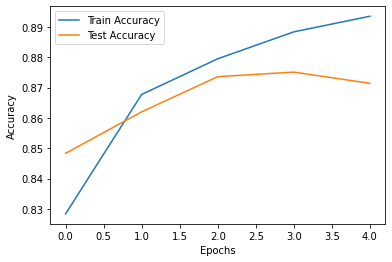

In [11]:
## Plot accuracy
plt.plot(model.history.history['accuracy'],label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('accuracy_plot.png')
plt.show()

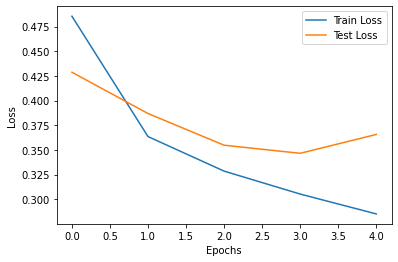

In [14]:
# Plot loss
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('loss_plot.png')
plt.show()

In [15]:
## Evaluate how it performs on unseen data.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8714


[0.3656359612941742, 0.871399998664856]

Once training is complete, we will see an accuracy value at the end of the final epoch. This should return an accuracy of about 88% for the training set and 87% for the test set. The exact value will differ with different runs because the weights of `Dense` layers are **initialized randomly** One way is to initialize it with the same values all the time. Another is to use the seed argument:
For example,
```
tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=5))
```
`GlorotUniform` is the default kernel initializer for the dense layer. We do not need to specify a seed for the `bias_initializer` because by default, it sets all the bias values to zero.

Performance can be improved by changing the number of epochs or any other hyperparameters such as the optimizer, the optimizer's learning rate, etc.

In [17]:
# Take  2
#
# Adam is a popular optimizer. We have a classification problem where the
# labels aren't one-hot encoded, so we use a `sparse` categorical entropy loss.
model.compile(
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=1e-4
    ),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit model by invoking the fit method.
model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1991 - accuracy: 0.9266 - val_loss: 0.3067 - val_accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1958 - accuracy: 0.9280 - val_loss: 0.3071 - val_accuracy: 0.8918
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1928 - accuracy: 0.9295 - val_loss: 0.3103 - val_accuracy: 0.8921
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1899 - accuracy: 0.9305 - val_loss: 0.3048 - val_accuracy: 0.8933
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1873 - accuracy: 0.9314 - val_loss: 0.3049 - val_accuracy: 0.8954
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1845 - accuracy: 0.9324 - val_loss: 0.3049 - val_accuracy: 0.8928
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1813 - accuracy: 0.9342 - val_loss: 0.3045 - val_acc

[0.3062955141067505, 0.8949000239372253]

In [20]:
## Evaluate how it performs on unseesn data.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3063 - accuracy: 0.8949


[0.3062955141067505, 0.8949000239372253]